# Forecasting and Analysis of Public Transport Passenger Journeys by Service Type

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r'/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241028.csv',encoding = 'ISO-8859-1')

In [6]:
data.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,01/07/2019,15987,9962,407,21223,3715,NaN
1,30/08/2024,16436,10705,225,19026,3925,59.0
2,15/09/2023,15499,10671,267,18421,4519,61.0
3,28/12/2021,1756,2352,0,3775,0,13.0
4,11/01/2023,10536,8347,223,14072,0,48.0


In [7]:
data.shape

(1918, 7)

In [8]:
data.isnull().sum()

,0
Date,0
Local Route,0
Light Rail,0
Peak Service,0
Rapid Route,0
School,0
Other,2


In [9]:
data['Other'].fillna(data['Other'].mean(), inplace=True)

<ipython-input-9-9ba3352eb776>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other'].fillna(data['Other'].mean(), inplace=True)


In [10]:
data.duplicated().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1918 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Local Route,1918.0,9891.395203,6120.715714,1.0,3044.5,11417.0,15517.50,21070.0
Light Rail,1918.0,7195.446298,3345.616428,0.0,4463.5,7507.0,10008.25,15154.0
Peak Service,1918.0,179.581335,156.532738,0.0,0.0,193.0,313.75,1029.0
Rapid Route,1918.0,12597.213243,6720.494557,0.0,6383.0,13106.5,17924.75,28678.0
School,1918.0,2352.694995,2494.766306,0.0,0.0,567.5,4914.00,7255.0
Other,1918.0,42.983299,41.738320,0.0,14.0,39.0,67.75,1105.0


In [13]:
data.dtypes

,0
Date,object
Local Route,int64
Light Rail,int64
Peak Service,int64
Rapid Route,int64
School,int64
Other,float64


In [14]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [15]:
columns_to_forecast = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']

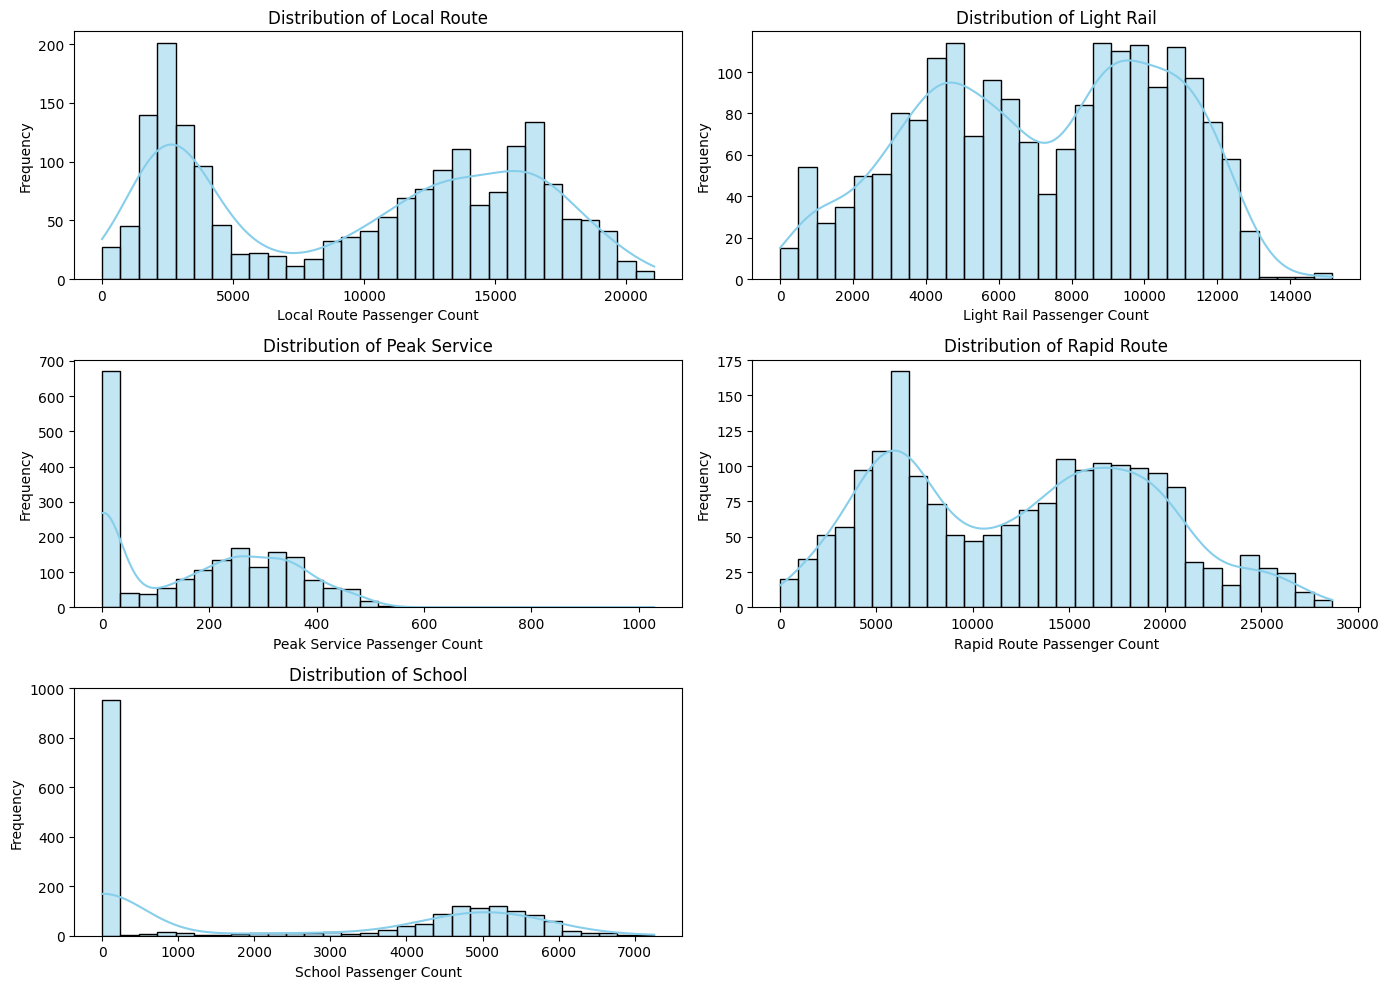

In [18]:
# Feature-wise Distribution Plot
plt.figure(figsize=(14, 10))
for i, column in enumerate(columns_to_forecast):
    plt.subplot(3, 2, i+1)
    sns.histplot(data[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Passenger Count')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Insights:
1. Local route: Long tail at the end indicating higher passenger counts. Therefore has higher ridership.
2. light rail:
Distribution more concentrated at lower end at around 4000 passengers which suggests that it has lower ridership compared to local route.
3. local and peak service routes hae a wide range of passenger counts compared to loght and rapid route.
4. light and rapid route have a higher proportion of routes with lower passenger counts.
5. school routes genrally have lower passenger counts compared to other modes

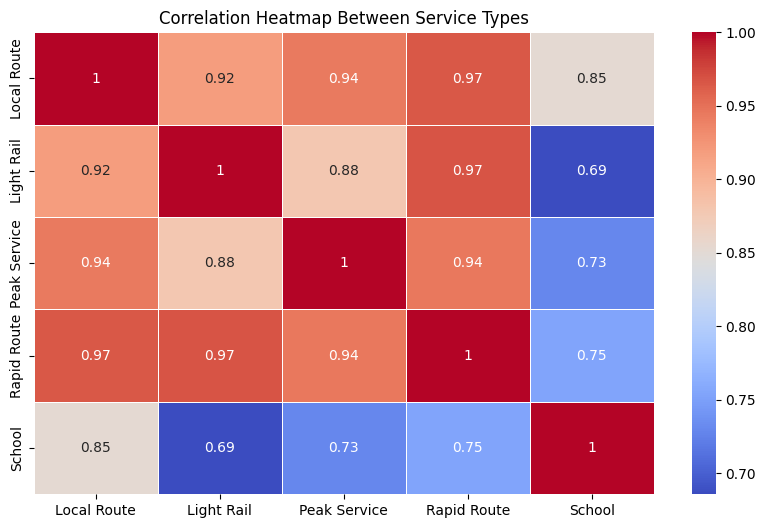

In [19]:
# Correlation Heatmap Between Service Types
plt.figure(figsize=(10, 6))
correlation_matrix = data[columns_to_forecast].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Service Types')
plt.show()

Insights:
1. Peak Service Correlations: Peak Service is highly correlated with Local Route (0.94) and Rapid Route (0.94), showing that peak hours impact these services more significantly.
2. Local Route and Rapid Route have a strong correlation (0.97), indicating that usage patterns for these two services tend to be similar.
3. Most services, except School, are strongly correlated with each other, which may reflect general usage patterns influenced by overall public transport demand.

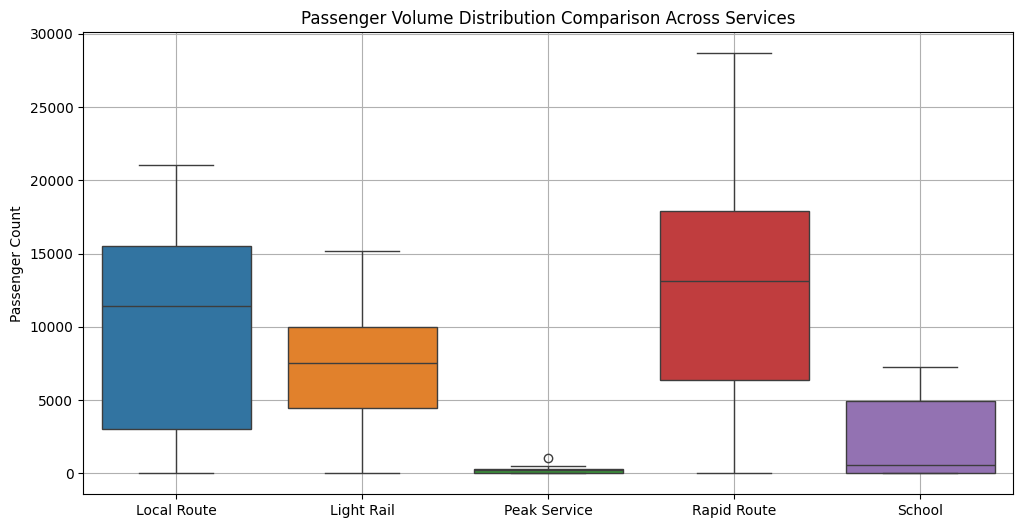

In [20]:
# Passenger volume distribution comparison using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[columns_to_forecast])
plt.title('Passenger Volume Distribution Comparison Across Services')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

Insights from box plot:

1. Local Route and Rapid Route have the highest passenger count than other services since their medians are larger.
2. Comparatively local route has high range which shows that the passenger count varies significantly on day-to-day
3. School services have low but consistent usage
4. Peak services are used very minimally


Contribution of Each Service to Total Ridership (%):
Local Route     30.703047
Light Rail      22.334779
Peak Service     0.557423
Rapid Route     39.101949
School           7.302802
dtype: float64


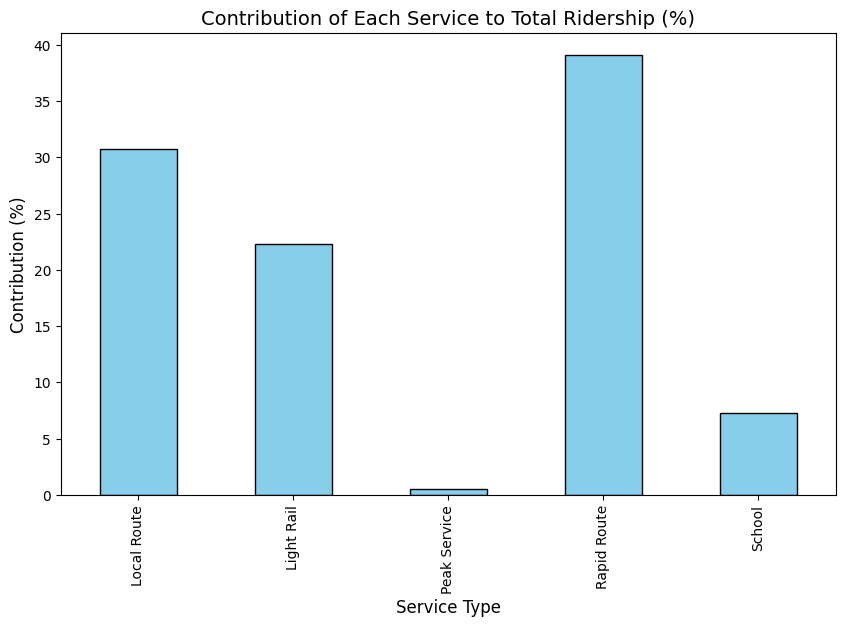

In [21]:
# Contribution of each service to Total Ridership:
data['Total_Journeys'] = data[columns_to_forecast].sum(axis=1)
service_contributions = data[columns_to_forecast].sum() / data['Total_Journeys'].sum() * 100
print("\nContribution of Each Service to Total Ridership (%):")
print(service_contributions)

plt.figure(figsize=(10, 6))
service_contributions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Contribution of Each Service to Total Ridership (%)', fontsize=14)
plt.xlabel('Service Type', fontsize=12)
plt.ylabel('Contribution (%)', fontsize=12)
plt.show()

Insights:

1. People prefer rapid route more than the other transport services since it contributes most to the ridership

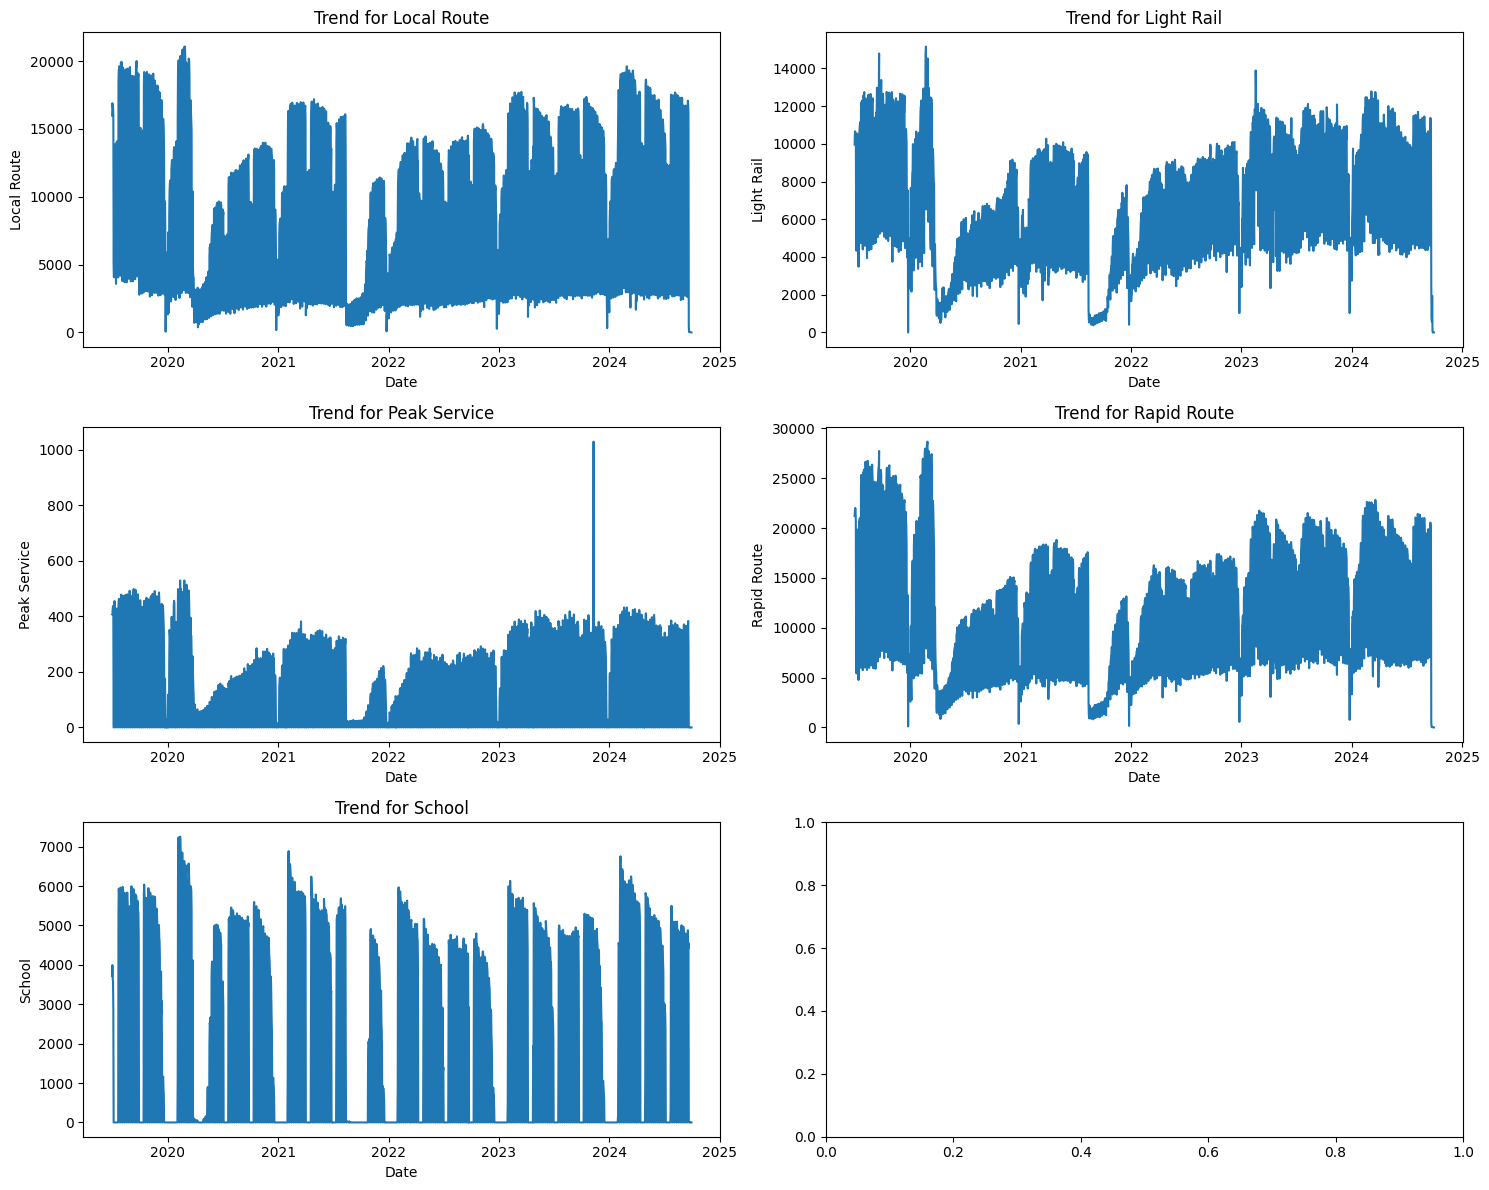

In [22]:
# Line plot for each column to observe time trends
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

for i, col in enumerate(columns_to_forecast):
    sns.lineplot(x='Date', y=col, data=data, ax=axs[i // 2, i % 2])
    axs[i // 2, i % 2].set_title(f'Trend for {col}')

plt.tight_layout()
plt.show()


Insights:
1. There is an observable growth in ridership across most services, particularly in the light rail and rapid routes.
2. Seasonal fluctuations suggest that specific times of the year see higher demand, likely due to holidays or events.
3. Significant anomalies,are seen in peak service and the "Other" category must.

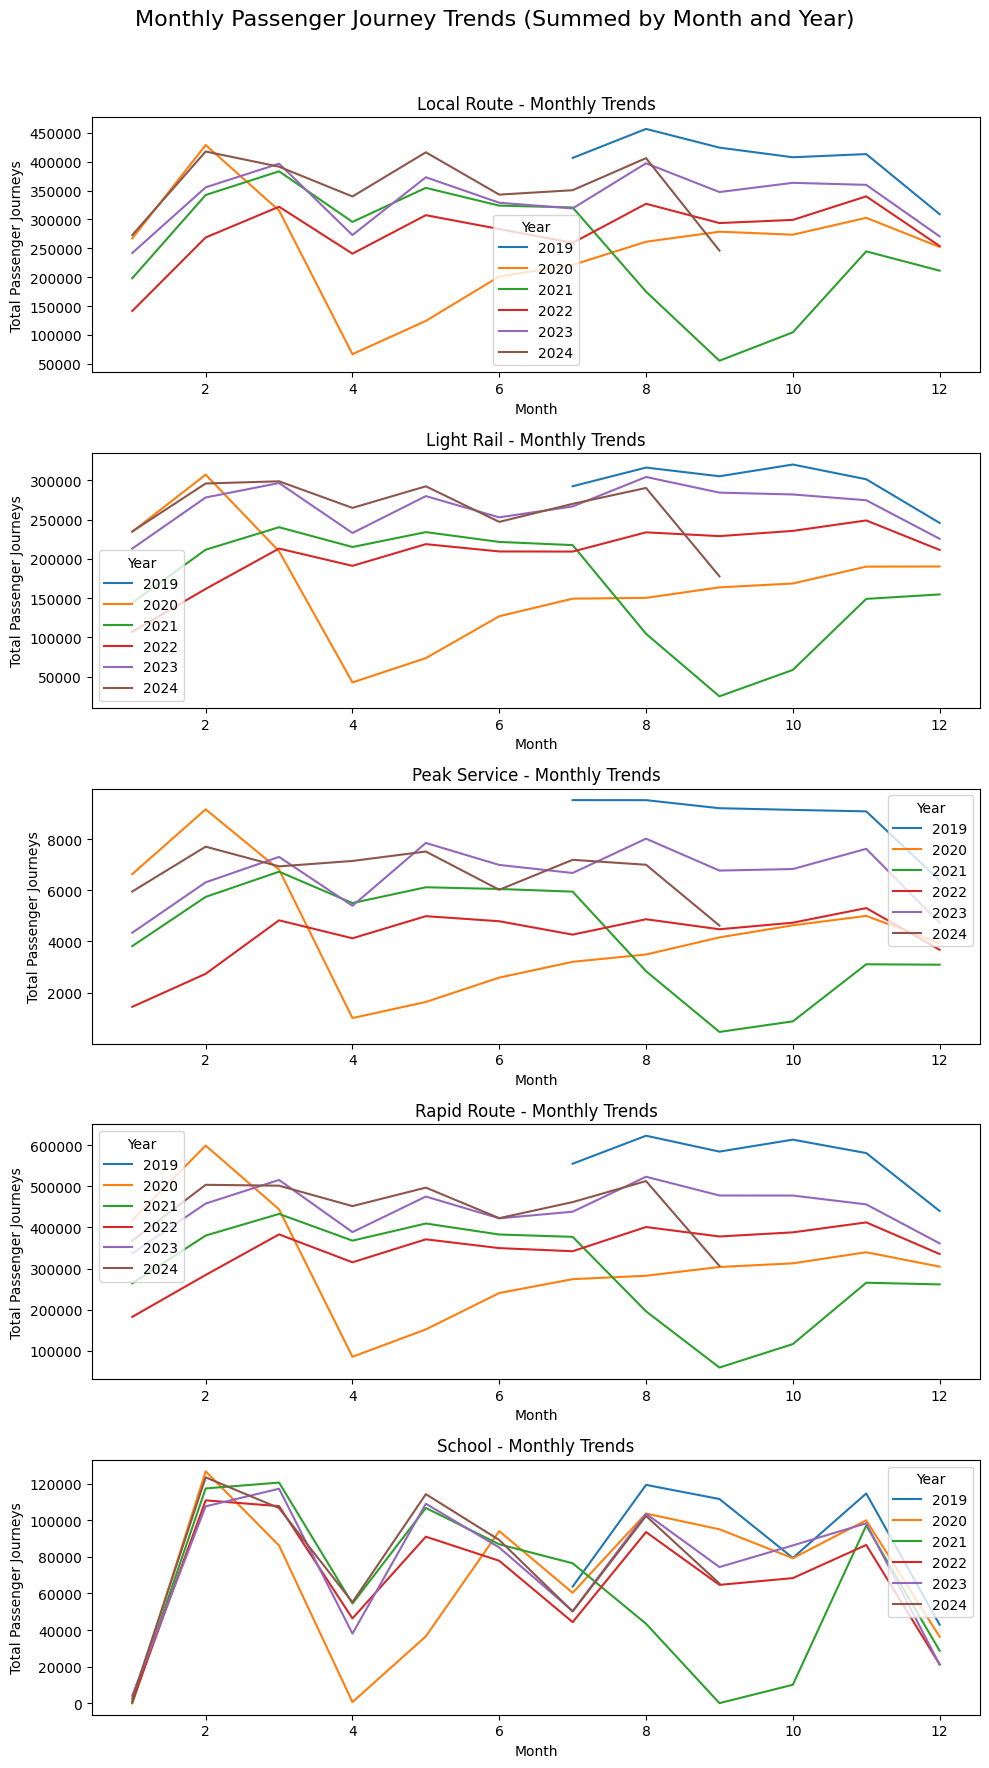

In [23]:
# Monthly trends plot
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

monthly_trends = data.groupby(['Year', 'Month'])[columns_to_forecast].sum().unstack(level=0)

fig, ax = plt.subplots(len(columns_to_forecast), 1, figsize=(10, 18))
fig.suptitle("Monthly Passenger Journey Trends (Summed by Month and Year)", fontsize=16)

for i, column in enumerate(columns_to_forecast):
    monthly_trends[column].plot(ax=ax[i])
    ax[i].set_title(f"{column} - Monthly Trends")
    ax[i].set_xlabel("Month")
    ax[i].set_ylabel("Total Passenger Journeys")

plt.tight_layout(rect=[0, 0, 1, 0.96])

Insights:
1. During the year 2020, the usage of all the transports are very low. (Due to covid)
2. The usage of school services are almost similar for all the years (consistent) than other services (without considering 2020)
3. The usage of transport services after the month of may significantly decreases for the year 2021. (covid)

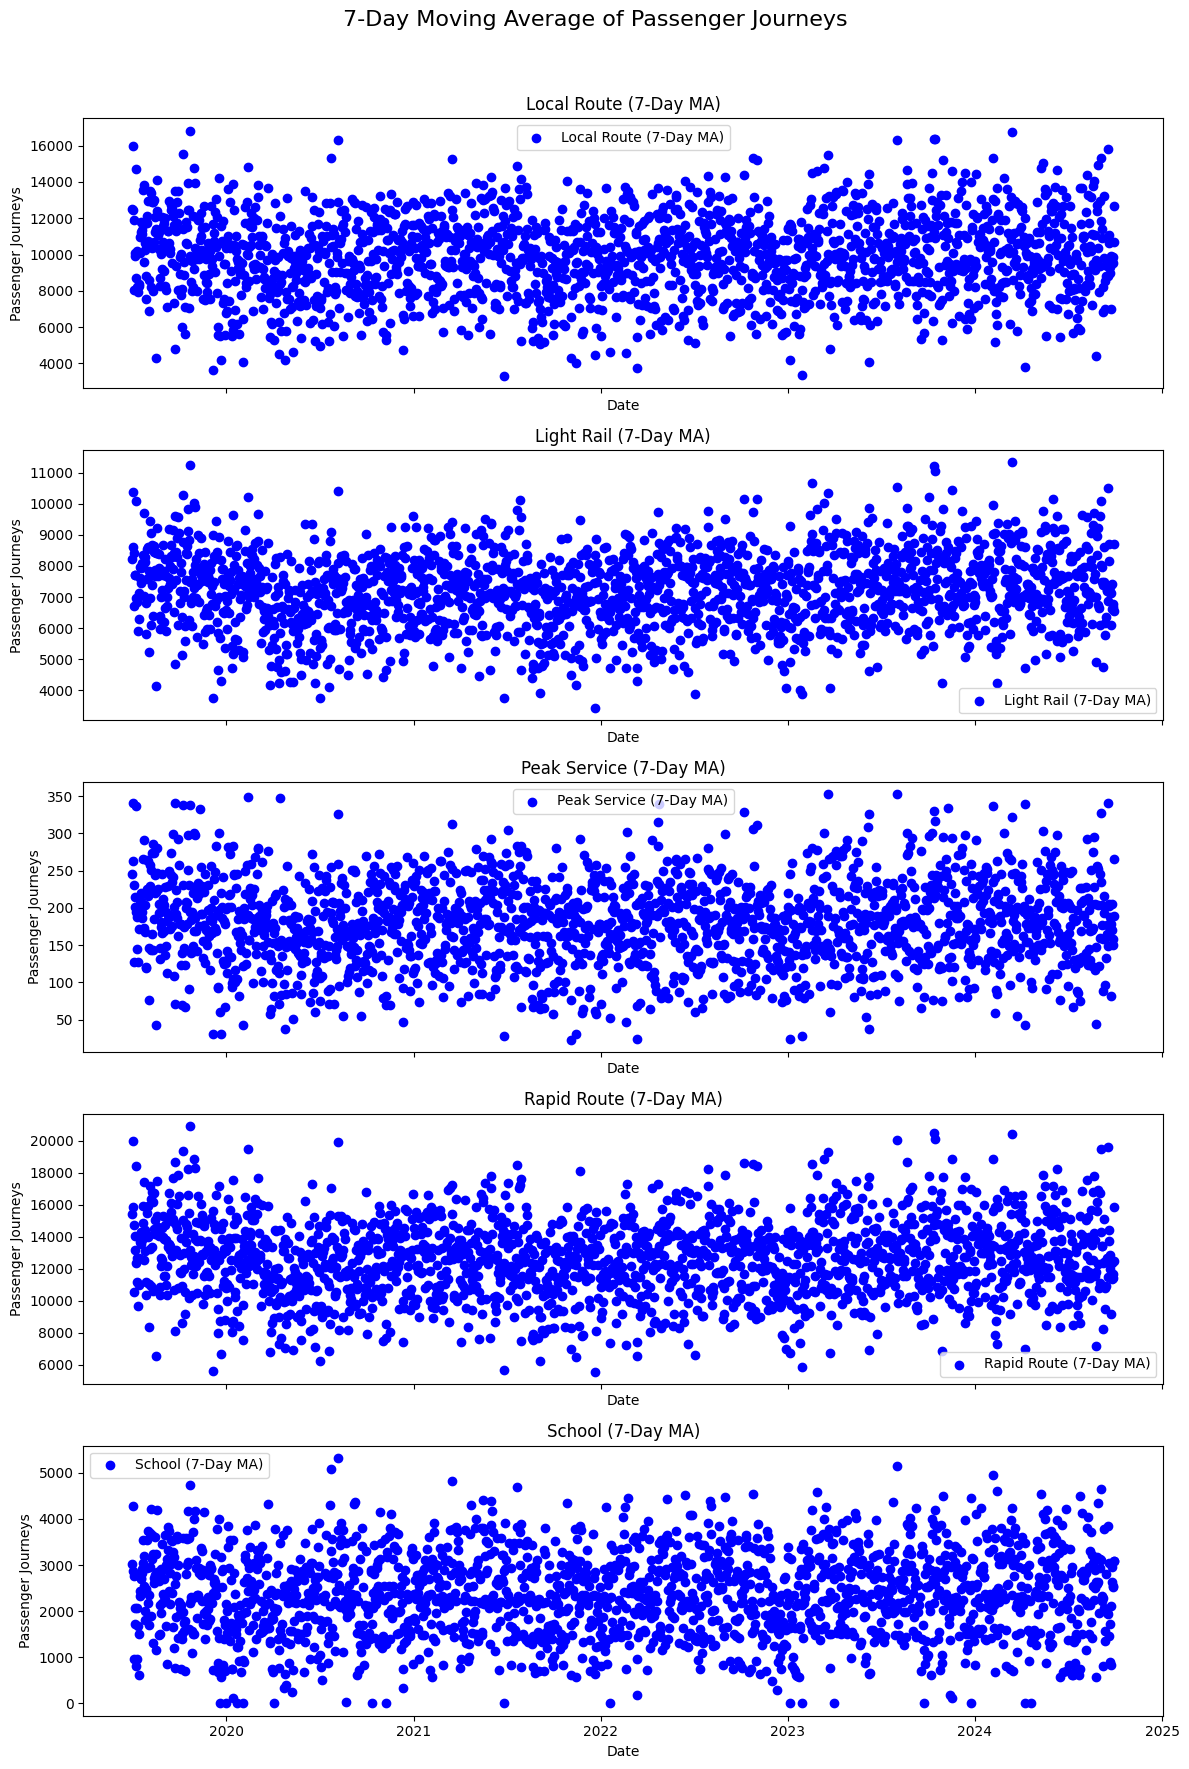

In [24]:
# Calculate the 7-day moving average
moving_avg = data.set_index('Date')[columns_to_forecast].rolling(window=7).mean()

fig, axs = plt.subplots(len(columns_to_forecast), 1, figsize=(12, 18), sharex=True)
fig.suptitle("7-Day Moving Average of Passenger Journeys", fontsize=16)

for i, column in enumerate(columns_to_forecast):
    axs[i].scatter(moving_avg.index, moving_avg[column], label=f"{column} (7-Day MA)", color='blue')
    axs[i].set_title(f"{column} (7-Day MA)")
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Passenger Journeys")
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [25]:
data.set_index('Date', inplace=True)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/9ohtsy3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/otu6ikxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27461', 'data', 'file=/tmp/tmpah5jg3rt/9ohtsy3m.json', 'init=/tmp/tmpah5jg3rt/otu6ikxv.json', 'output', 'file=/tmp/tmpah5jg3rt/prophet_modelcdu48xet/prophet_model-20241028065012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


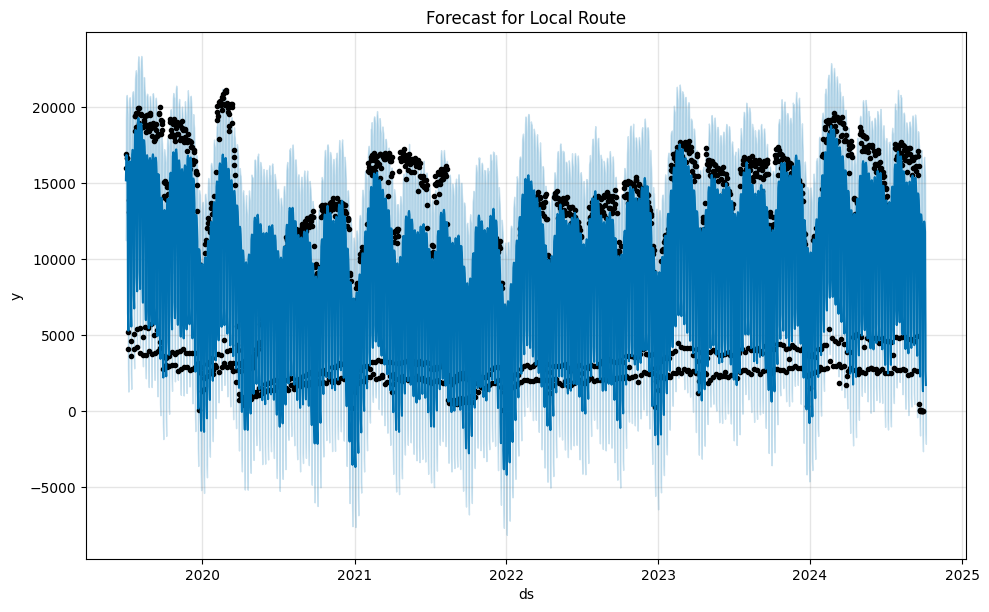

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/pnkghgpl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/pl9zn7gl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1822', 'data', 'file=/tmp/tmpah5jg3rt/pnkghgpl.json', 'init=/tmp/tmpah5jg3rt/pl9zn7gl.json', 'output', 'file=/tmp/tmpah5jg3rt/prophet_model25sttp86/prophet_model-20241028065014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


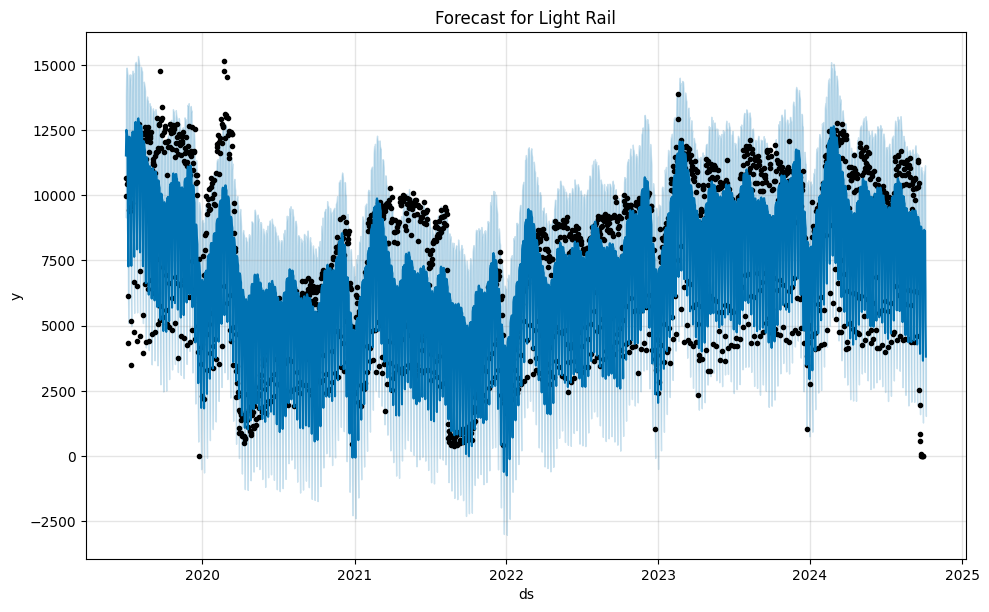

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/gsm25l8u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/3zir6r00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63135', 'data', 'file=/tmp/tmpah5jg3rt/gsm25l8u.json', 'init=/tmp/tmpah5jg3rt/3zir6r00.json', 'output', 'file=/tmp/tmpah5jg3rt/prophet_model3al_zofg/prophet_model-20241028065017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


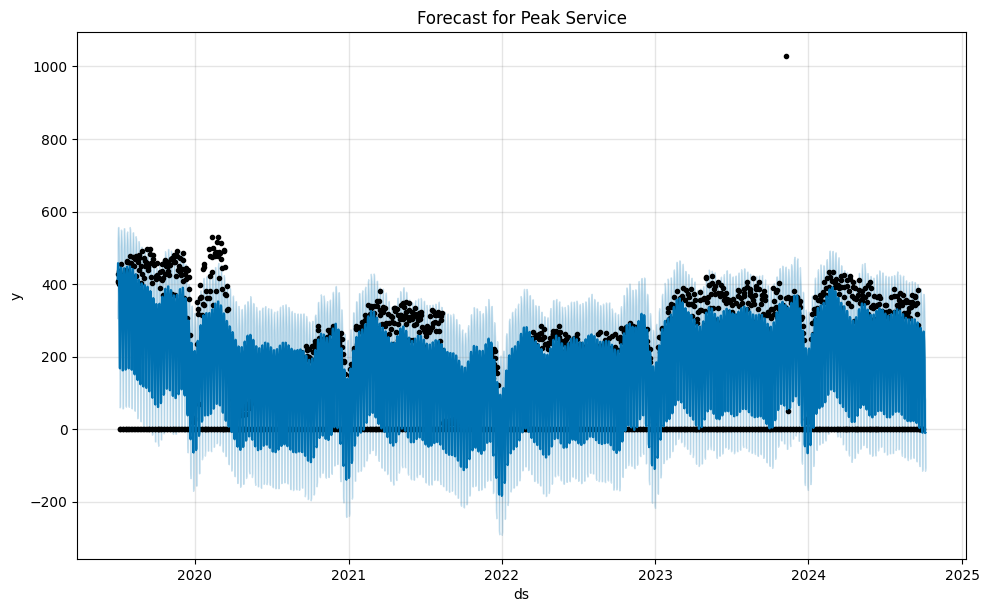

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/t74ad0ip.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/m7ab9i8a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78459', 'data', 'file=/tmp/tmpah5jg3rt/t74ad0ip.json', 'init=/tmp/tmpah5jg3rt/m7ab9i8a.json', 'output', 'file=/tmp/tmpah5jg3rt/prophet_model_cf1i6sw/prophet_model-20241028065020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


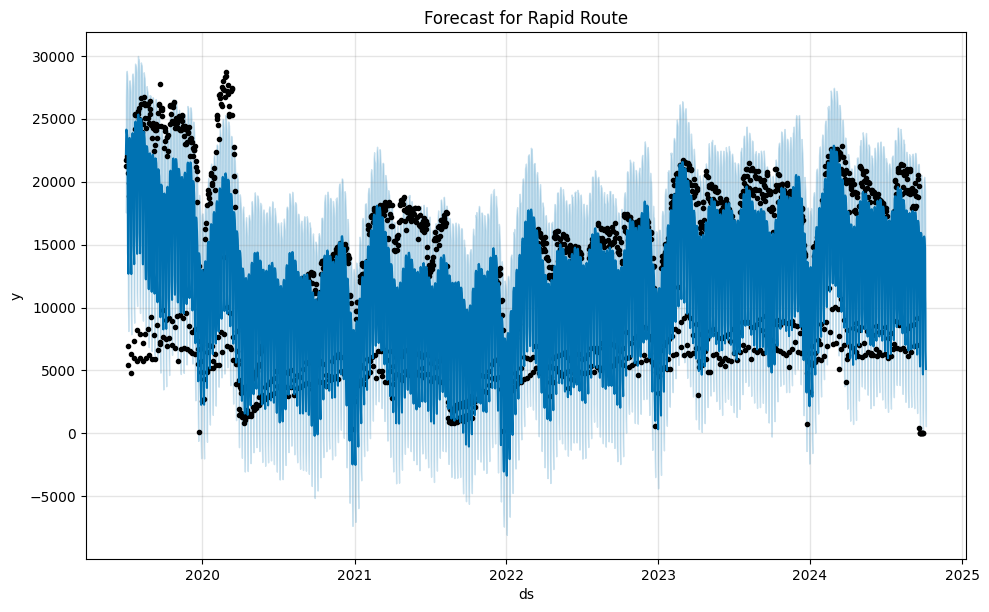

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/0ecj0xy0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpah5jg3rt/m44w0ih5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52640', 'data', 'file=/tmp/tmpah5jg3rt/0ecj0xy0.json', 'init=/tmp/tmpah5jg3rt/m44w0ih5.json', 'output', 'file=/tmp/tmpah5jg3rt/prophet_model5l7dxyw3/prophet_model-20241028065022.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:50:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:50:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


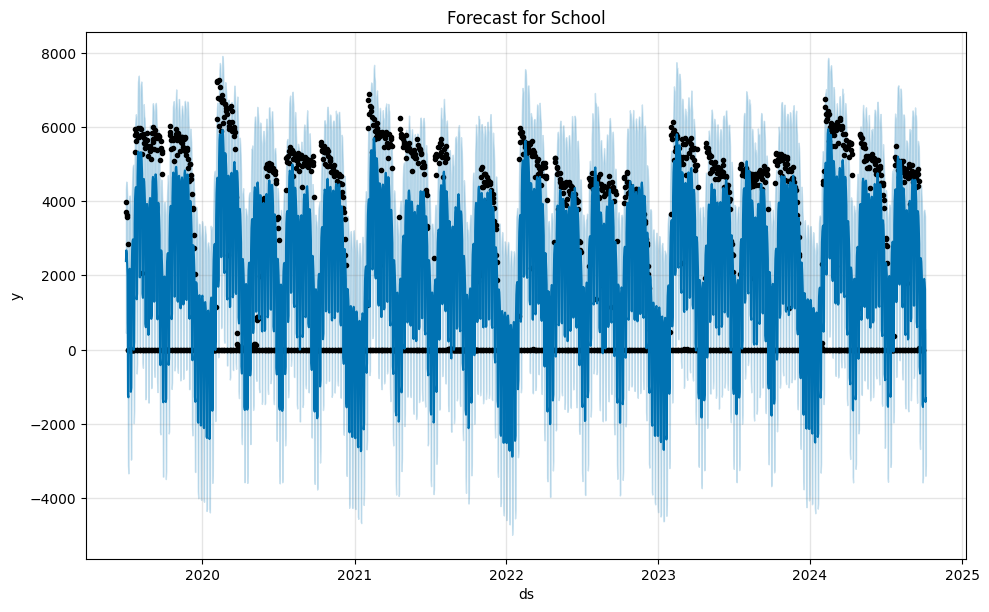

In [26]:
## using Prophet TIME SERIES MODEL
from prophet import Prophet


forecasts = {}
for col in columns_to_forecast:
    df_prophet = data[[col]].reset_index().rename(columns={'Date': 'ds', col: 'y'})
    model = Prophet()
    model.fit(df_prophet)

    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    forecasts[col] = forecast[['ds', 'yhat']].tail(7)  # Extract the last 7 days

    model.plot(forecast)
    plt.title(f'Forecast for {col}')
    plt.show()


In [27]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np

y_true = df_prophet['y']
y_pred = forecast['yhat'][:len(y_true)]

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")


MAE: 2685.533811884496
MAPE: 5.70220919261673e+18
RMSE: 3204.0388113099793


In [28]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-01,2799.087825,510.238014,4280.023429,2799.087825,2799.087825,-410.739441,-410.739441,-410.739441,659.919186,659.919186,659.919186,-1070.658627,-1070.658627,-1070.658627,0.0,0.0,0.0,2388.348384
1,2019-07-02,2797.802695,648.127582,4626.056093,2797.802695,2797.802695,-120.385674,-120.385674,-120.385674,1100.540214,1100.540214,1100.540214,-1220.925888,-1220.925888,-1220.925888,0.0,0.0,0.0,2677.417021
2,2019-07-03,2796.517564,613.272334,4512.054978,2796.517564,2796.517564,-206.566138,-206.566138,-206.566138,1151.149687,1151.149687,1151.149687,-1357.715826,-1357.715826,-1357.715826,0.0,0.0,0.0,2589.951426
3,2019-07-04,2795.232434,324.639984,4207.900306,2795.232434,2795.232434,-461.012511,-461.012511,-461.012511,1017.452808,1017.452808,1017.452808,-1478.465319,-1478.465319,-1478.465319,0.0,0.0,0.0,2334.219923
4,2019-07-05,2793.947304,-106.333127,3821.516042,2793.947304,2793.947304,-807.038224,-807.038224,-807.038224,773.799362,773.799362,773.799362,-1580.837585,-1580.837585,-1580.837585,0.0,0.0,0.0,1986.909080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,2024-10-02,2607.496862,-159.347847,3809.391542,2607.496862,2607.496862,-698.306297,-698.306297,-698.306297,1151.149687,1151.149687,1151.149687,-1849.455984,-1849.455984,-1849.455984,0.0,0.0,0.0,1909.190565
1921,2024-10-03,2607.998330,12.308394,3715.088025,2607.998330,2607.998330,-796.473369,-796.473369,-796.473369,1017.452808,1017.452808,1017.452808,-1813.926177,-1813.926177,-1813.926177,0.0,0.0,0.0,1811.524961
1922,2024-10-04,2608.499798,-422.354345,3506.196967,2608.499798,2608.499798,-979.175614,-979.175614,-979.175614,773.799362,773.799362,773.799362,-1752.974975,-1752.974975,-1752.974975,0.0,0.0,0.0,1629.324184
1923,2024-10-05,2609.001266,-3325.283147,522.135744,2609.001266,2609.001266,-4019.417480,-4019.417480,-4019.417480,-2351.579036,-2351.579036,-2351.579036,-1667.838444,-1667.838444,-1667.838444,0.0,0.0,0.0,-1410.416213


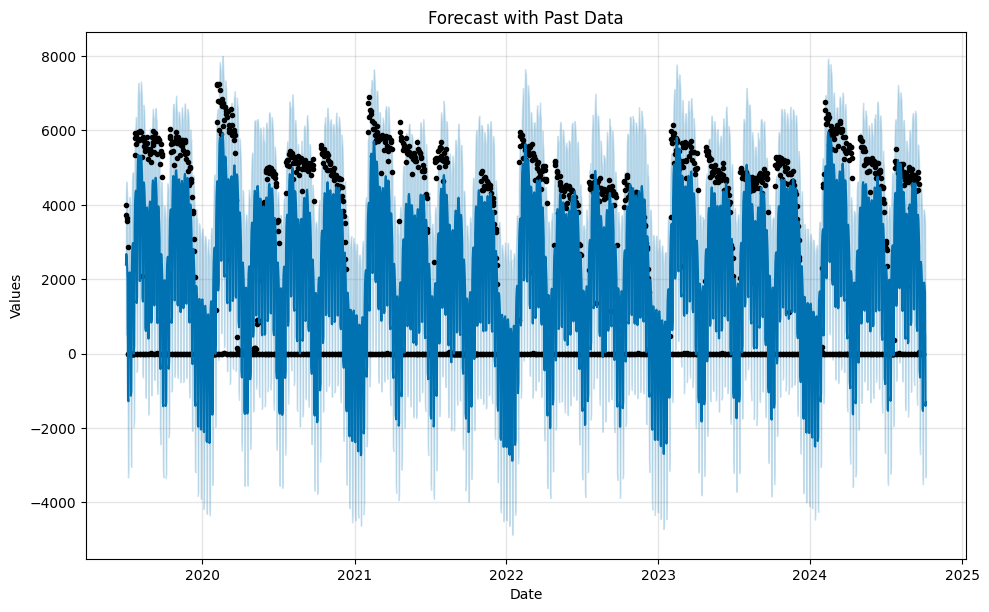

In [29]:
fig = model.plot(forecast)
plt.title("Forecast with Past Data")
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()
